# Import libraries

In [131]:
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#clustering model library
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture
from sklearn.mixture import GaussianMixture



In [132]:
#read data
data=pd.read_csv("mcdonalds.csv")

In [133]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [134]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [135]:
data.shape

(1453, 15)

In [136]:
data.replace({'Yes': 1, 'No': 0}, inplace=True)
data.replace({'I hate it!-5': '-5','I love it!+5':'+5'}, inplace=True)
# calculate column means

col_means = np.round(np.mean(data.iloc[:, :11].values, axis=0),2)
col_means


array([0.55, 0.91, 0.09, 0.87, 0.53, 0.9 , 0.6 , 0.64, 0.36, 0.2 , 0.24])

In [137]:
# perform PCA
pca = PCA(n_components=11)
data_pca=pca.fit(data.iloc[:, :11].values)

stds = np.sqrt(pca.explained_variance_)
var_prop = pca.explained_variance_ratio_
cum_prop = np.cumsum(var_prop)



# Importance of Components

In [139]:
for i in range(len(stds)):
  print('PC{}:\n Standard deviation: {:.5f}'.format(i+1, stds[i]))
  print('Proportional variance: {:.5f}'.format(var_prop[i]))
  print('Cumulative proportion: {:.5f}\n'.format(cum_prop[i]))

PC1:
 Standard deviation: 0.75705
Proportional variance: 0.29945
Cumulative proportion: 0.29945

PC2:
 Standard deviation: 0.60746
Proportional variance: 0.19280
Cumulative proportion: 0.49224

PC3:
 Standard deviation: 0.50462
Proportional variance: 0.13305
Cumulative proportion: 0.62529

PC4:
 Standard deviation: 0.39880
Proportional variance: 0.08310
Cumulative proportion: 0.70839

PC5:
 Standard deviation: 0.33741
Proportional variance: 0.05948
Cumulative proportion: 0.76787

PC6:
 Standard deviation: 0.31027
Proportional variance: 0.05030
Cumulative proportion: 0.81817

PC7:
 Standard deviation: 0.28970
Proportional variance: 0.04385
Cumulative proportion: 0.86201

PC8:
 Standard deviation: 0.27512
Proportional variance: 0.03955
Cumulative proportion: 0.90156

PC9:
 Standard deviation: 0.26525
Proportional variance: 0.03676
Cumulative proportion: 0.93832

PC10:
 Standard deviation: 0.24884
Proportional variance: 0.03235
Cumulative proportion: 0.97068

PC11:
 Standard deviation: 0.

In [140]:
pca_cols = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']
loadings_matrix = pd.DataFrame(pca.components_.T, columns=pca_cols, index=data.columns[:11])
loadings_matrix

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069
healthy,-0.213711,0.076593,0.192051,0.763488,0.287846,-0.178226,-0.349616,0.176303,-0.185572,-0.038117,0.157608


# Perceptual Map

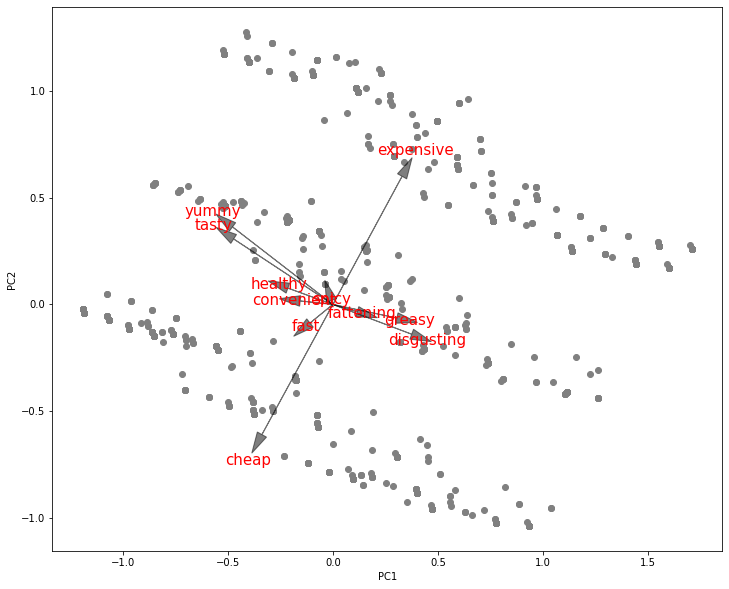

In [142]:
# plot PCA
load_mat2 = loadings_matrix[['PC1', 'PC2']]
data_x=data.iloc[:, :11].values
plt.figure(figsize=(12, 10))
plt.scatter(data_pca.transform(data_x)[:, 0], data_pca.transform(data_x)[:, 1], c='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')


for i, feature in enumerate(data.columns[:11]):
        plt.arrow(0, 0, load_mat2.values[i, 0], load_mat2.values[i, 1], color='black', alpha=0.5, head_width=0.05, head_length=0.1)
        plt.text(load_mat2.values[i, 0]*1.2, load_mat2.values[i, 1]*1.2, feature, color='r', ha='center', va='center', fontsize=15)
plt.show()

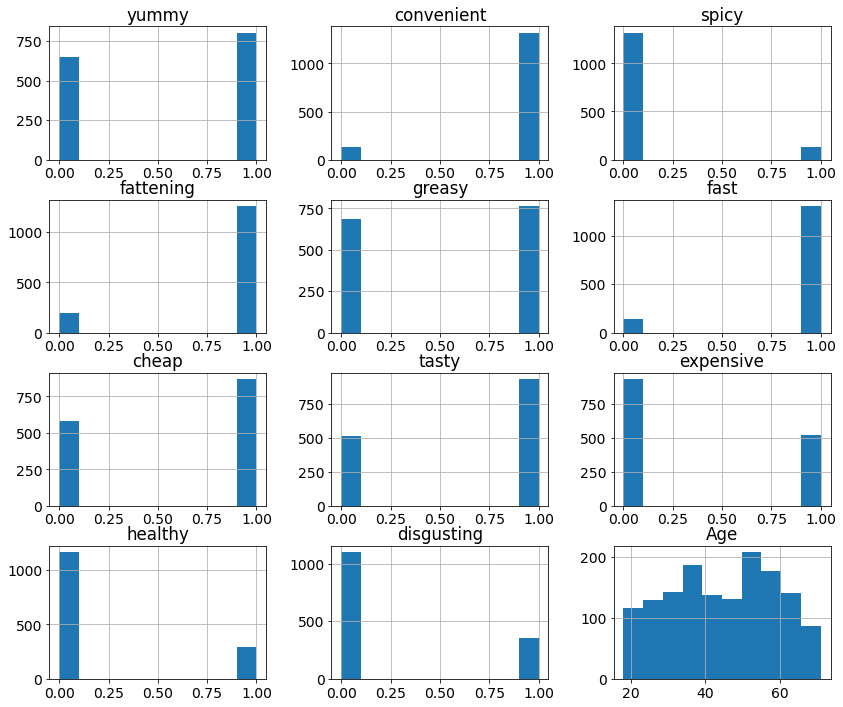

In [143]:
with plt.rc_context({'figure.figsize': (14,12), 'font.size': 14}):
    data.hist()
    plt.show()

# Extracting Segments

# Using k-Means

  


In [144]:
np.random.seed(1234)
data_x = data.iloc[:,2:9]

# Fit k-means models with 2 to 8 clusters and 10 random restarts
inertias = []
solutions = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=123)
    kmeans.fit(data_x)
    inertias.append(kmeans.inertia_)
    solutions.append(kmeans.labels_)


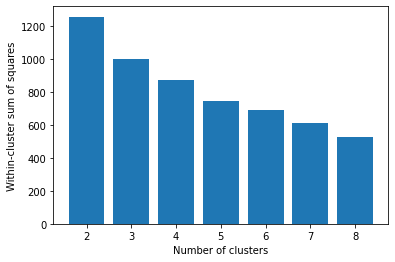

In [145]:
plt.bar(range(2, 9), inertias, align='center')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

# Profiling Segments

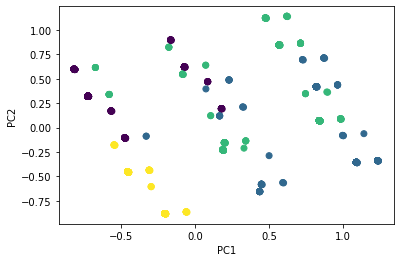

In [146]:
gmm = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gmm.fit(data_x)

pca = PCA(n_components=2)
proj = pca.fit_transform(data_x)

plt.scatter(proj[:, 0], proj[:, 1], c=gmm.predict(data_x))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()